**Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Fraud Detection for Online payment Platform- Datafest Datathon/Fraud Detection Dataset.csv')
data.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,...,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,...,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,...,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,...,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,...,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   User ID                            int64  
 2   Transaction Amount                 float64
 3   Transaction Date and Time          object 
 4   Merchant ID                        int64  
 5   Payment Method                     object 
 6   Country Code                       object 
 7   Transaction Type                   object 
 8   Device Type                        object 
 9   IP Address                         object 
 10  Browser Type                       object 
 11  Operating System                   object 
 12  Merchant Category                  object 
 13  User Age                           int64  
 14  User Occupation                    object 
 15  User Income                        float64
 16  User Gender       

In [ ]:
data.shape

(6000000, 32)

In [ ]:
data.columns

Index(['Transaction ID', 'User ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant ID', 'Payment Method',
       'Country Code', 'Transaction Type', 'Device Type', 'IP Address',
       'Browser Type', 'Operating System', 'Merchant Category', 'User Age',
       'User Occupation', 'User Income', 'User Gender', 'User Account Status',
       'Transaction Status', 'Location Distance', 'Time Taken for Transaction',
       'Transaction Time of Day', 'User's Transaction History',
       'Merchant's Reputation Score', 'User's Device Location',
       'Transaction Currency', 'Transaction Purpose', 'User's Credit Score',
       'User's Email Domain', 'Merchant's Business Age',
       'Transaction Authentication Method', 'Fraudulent Flag'],
      dtype='object')

In [ ]:
data.isnull().sum()

Transaction ID                       0
User ID                              0
Transaction Amount                   0
Transaction Date and Time            0
Merchant ID                          0
Payment Method                       0
Country Code                         0
Transaction Type                     0
Device Type                          0
IP Address                           0
Browser Type                         0
Operating System                     0
Merchant Category                    0
User Age                             0
User Occupation                      0
User Income                          0
User Gender                          0
User Account Status                  0
Transaction Status                   0
Location Distance                    0
Time Taken for Transaction           0
Transaction Time of Day              0
User's Transaction History           0
Merchant's Reputation Score          0
User's Device Location               0
Transaction Currency     

In [ ]:
duplicates = data[data.duplicated()] #check for duplicates
duplicates

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag


In [ ]:
data['Transaction Amount'].describe().T

count    6.000000e+06
mean     5.005515e+02
std      2.884166e+02
min      1.000000e+00
25%      2.507900e+02
50%      5.005100e+02
75%      7.504400e+02
max      1.000000e+03
Name: Transaction Amount, dtype: float64

In [ ]:
data['IP Address'].describe().T

count           6000000
unique          5995699
top       189.94.101.16
freq                  3
Name: IP Address, dtype: object

In [ ]:
# check the date and time range in the 'Transaction Date and Time' column

data['Transaction_Date_Time'] = pd.to_datetime(data['Transaction Date and Time'])
min_date = data['Transaction_Date_Time'].min()
max_date = data['Transaction_Date_Time'].max()

print(f"Date Range in Transaction_Date_Timecolumn: {min_date} to {max_date}")

Date Range in Transaction_Date_Timecolumn: 2021-01-01 00:00:34 to 2023-07-30 23:59:56


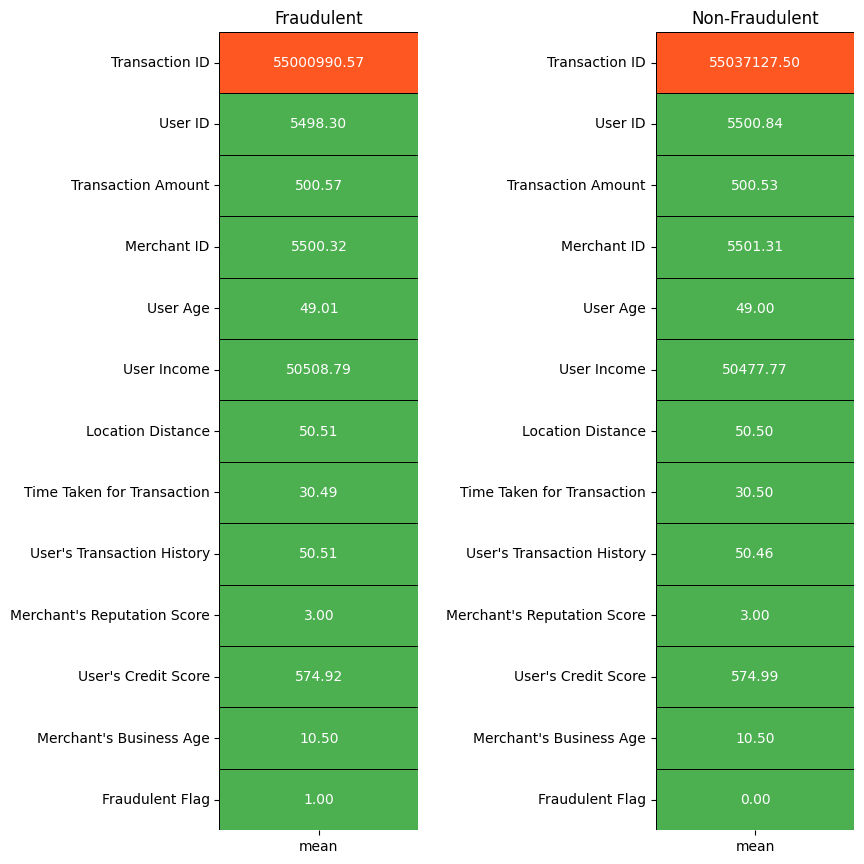

In [ ]:
# To visualize the mean values of the features for cases of fraudulent and non-fraudulent transactions

fraud_yes = data[data['Fraudulent Flag']==1.0].describe().T
fraud_no = data[data['Fraudulent Flag']==0.0].describe().T

colours = ['#4CAF50','#FF5722']
fig, ax = plt.subplots(1,2,figsize=(9,9))
plt.subplot(1,2,1)
sns.heatmap(fraud_yes[['mean']], annot=True,cmap=colours,linewidths=0.4,linecolor='black',cbar=False,fmt='.2f')
plt.title('Fraudulent')

plt.subplot(1,2,2)
sns.heatmap(fraud_no[['mean']], annot=True,cmap=colours,linewidths=0.4,linecolor='black',cbar=False,fmt='.2f')
plt.title('Non-Fraudulent');

fig.tight_layout(pad=2)

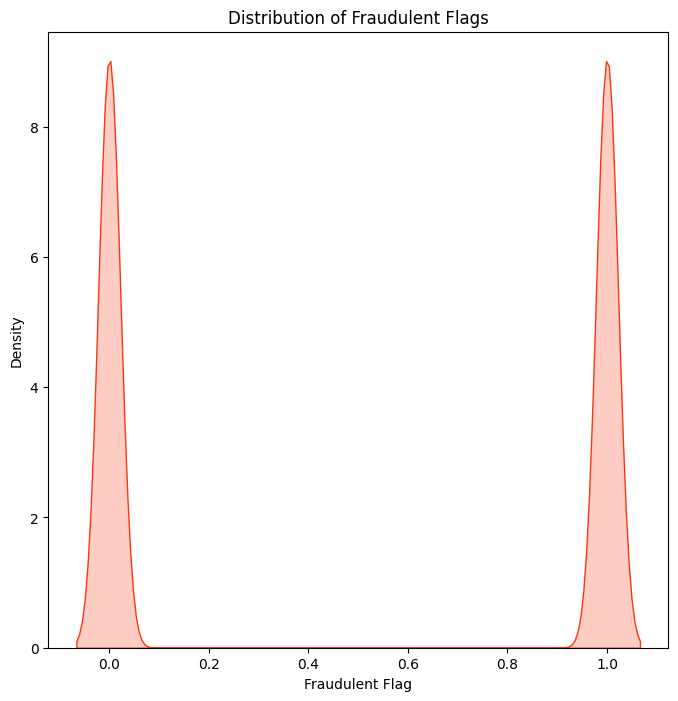

In [ ]:
# Visualize the distribution and balance between the target featuure classes
hue_color = '#F93712'

plt.figure(figsize=(8,8))
sns.kdeplot(data = data,x='Fraudulent Flag',fill='fill',color=hue_color)
plt.title('Distribution of Fraudulent Flags')
plt.show()

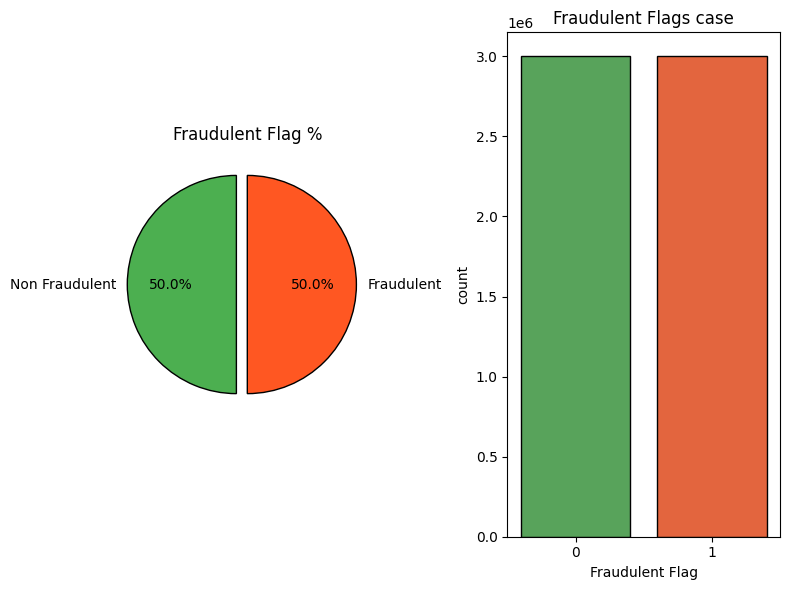

<Figure size 640x480 with 0 Axes>

In [ ]:
# visualize the proportion and count of the target feature

target_count = list(data['Fraudulent Flag'].value_counts())
circle = [target_count[0]/sum(target_count) * 100,target_count[1]/sum(target_count) * 100]

fig, ax = plt.subplots(1,2,figsize=(8,6))
plt.subplot(1,2,1)

plt.pie(circle,labels=['Non Fraudulent','Fraudulent'],autopct='%1.1f%%',startangle=90,explode=(0.1,0),colors=colours,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Fraudulent Flag %')

plt.subplot(1,2,2)
sns.countplot(x='Fraudulent Flag', data = data, palette = colours, edgecolor = 'black')
plt.title('Fraudulent Flags case');
plt.tight_layout()
plt.show()

plt.savefig('fig1.png')

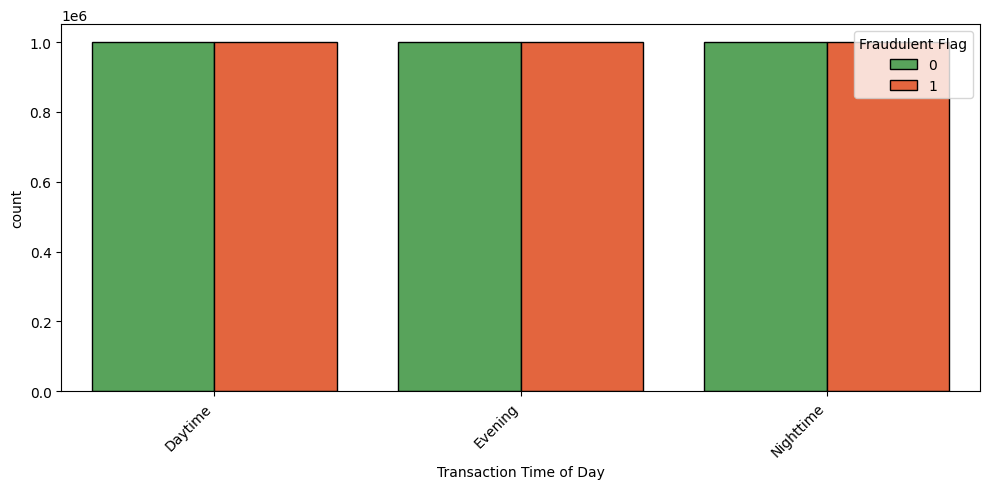

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Transaction Time of Day',data = data,hue = "Fraudulent Flag",palette = colours,edgecolor = 'black')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [ ]:
class_0 = (data['Fraudulent Flag']==0).sum()
class_1 = (data['Fraudulent Flag']==1).sum()

print(f"Class_0: {class_0}")
print(f"Class_1: {class_1}") #target variable is pretty much balanced

Class_0: 3000094
Class_1: 2999906


**Distribution of Cateegorical variables**



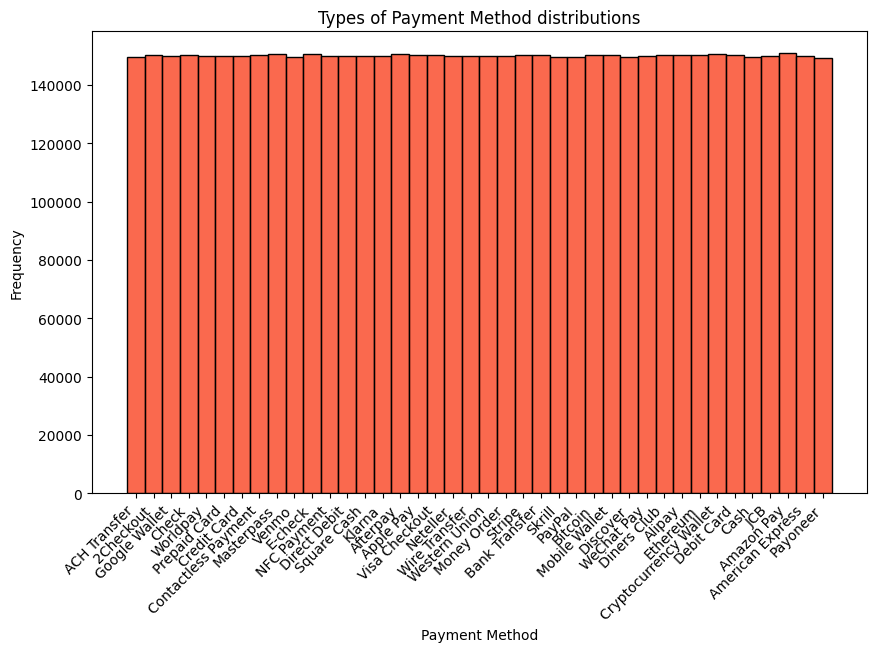

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='Payment Method',color=hue_color)
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Types of Payment Method distributions')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.savefig('fig2.png')

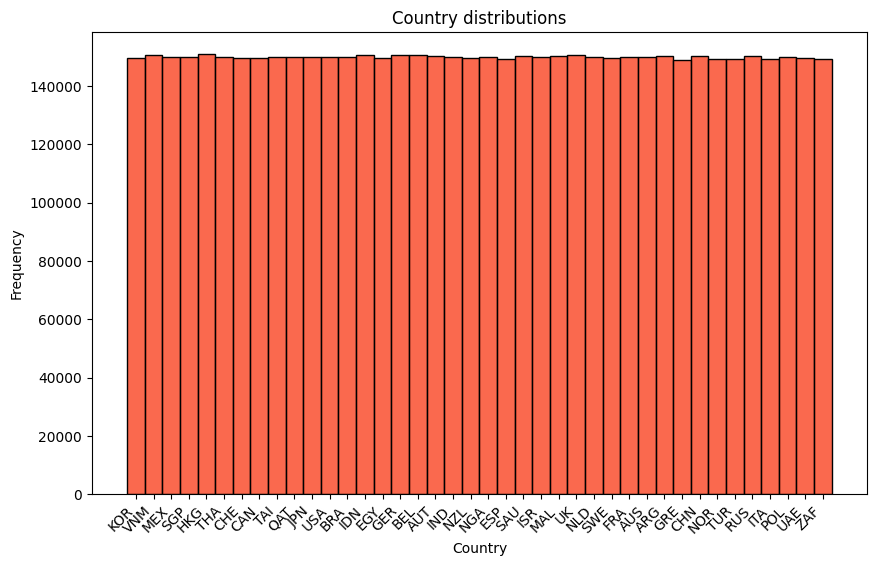

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='Country Code',color=hue_color)
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Country distributions')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.savefig('fig3.png')

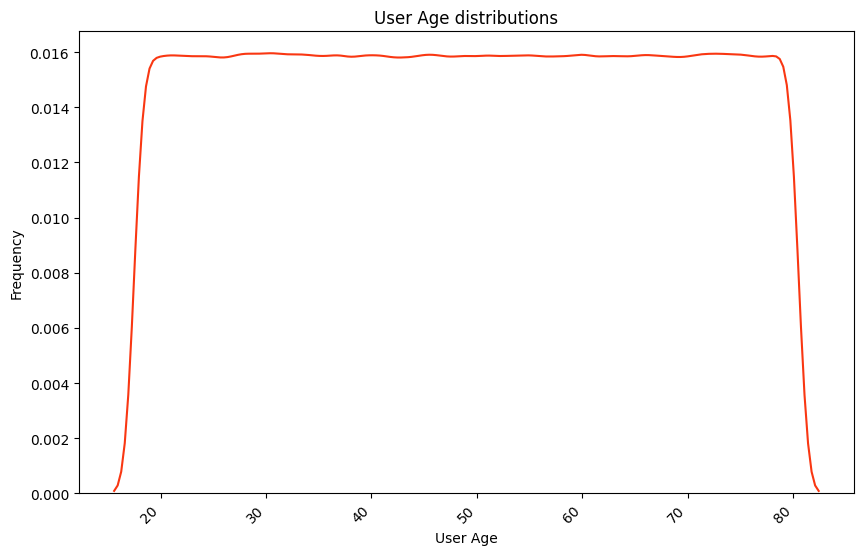

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data,x='User Age',color=hue_color)
plt.xlabel('User Age')
plt.ylabel('Frequency')
plt.title('User Age distributions')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.savefig('fig4.png')

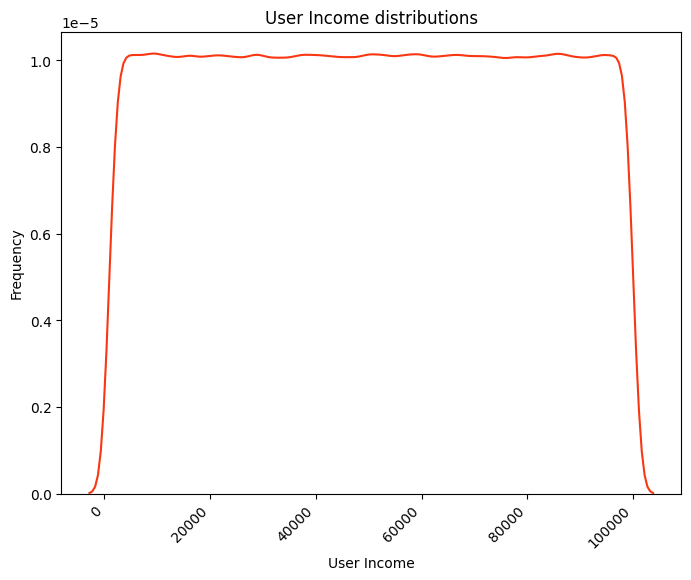

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=data,x='User Income',color=hue_color)
plt.xlabel('User Income')
plt.ylabel('Frequency')
plt.title('User Income distributions')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.savefig('fig5.png')

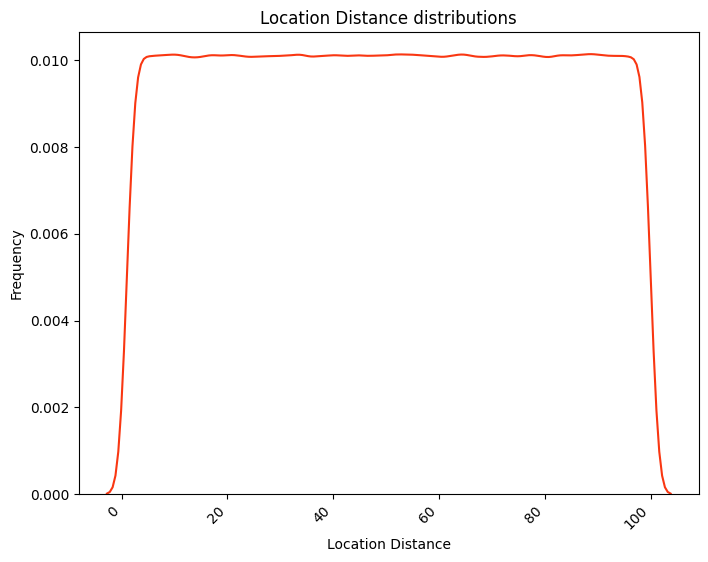

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=data,x='Location Distance',color=hue_color)
plt.xlabel('Location Distance')
plt.ylabel('Frequency')
plt.title('Location Distance distributions')
plt.xticks(rotation=45, ha='right')
plt.show()

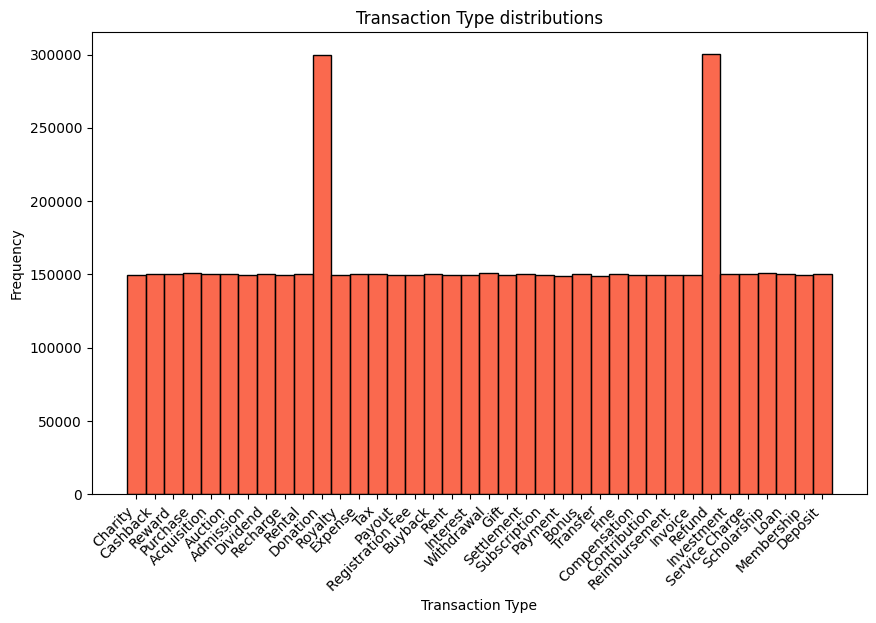

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='Transaction Type',color=hue_color)
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.title('Transaction Type distributions')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.savefig('fig6.png')

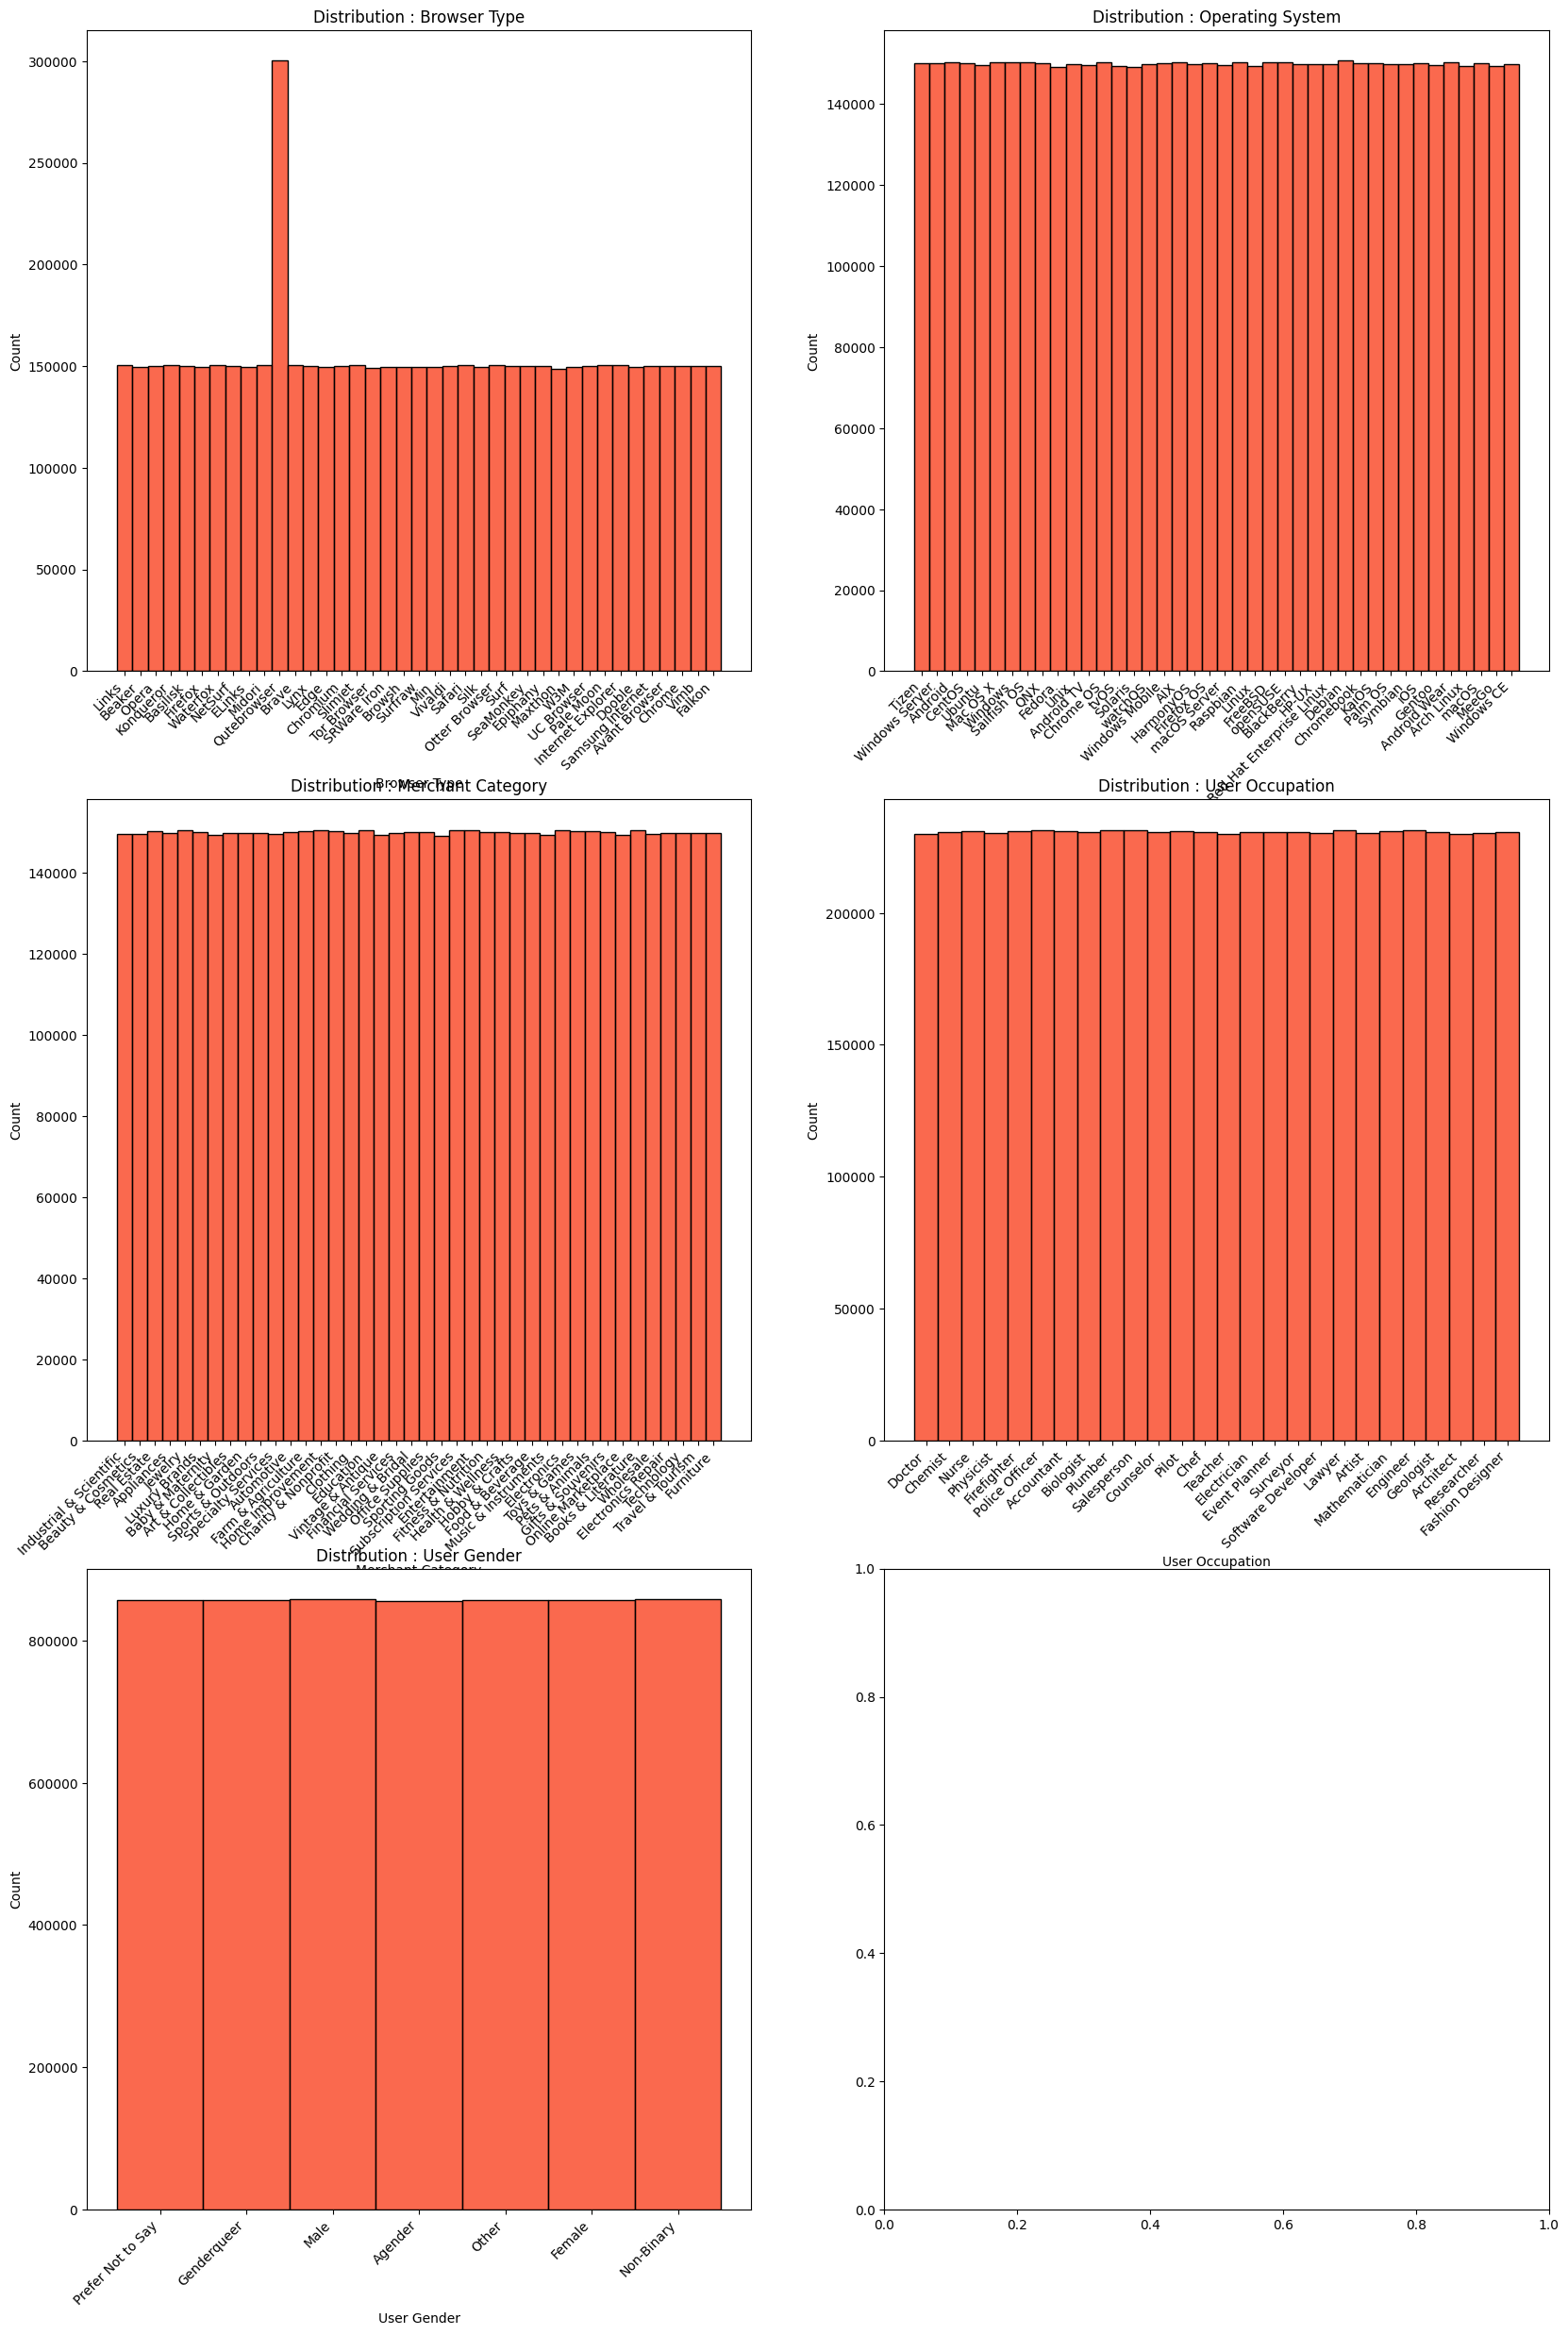

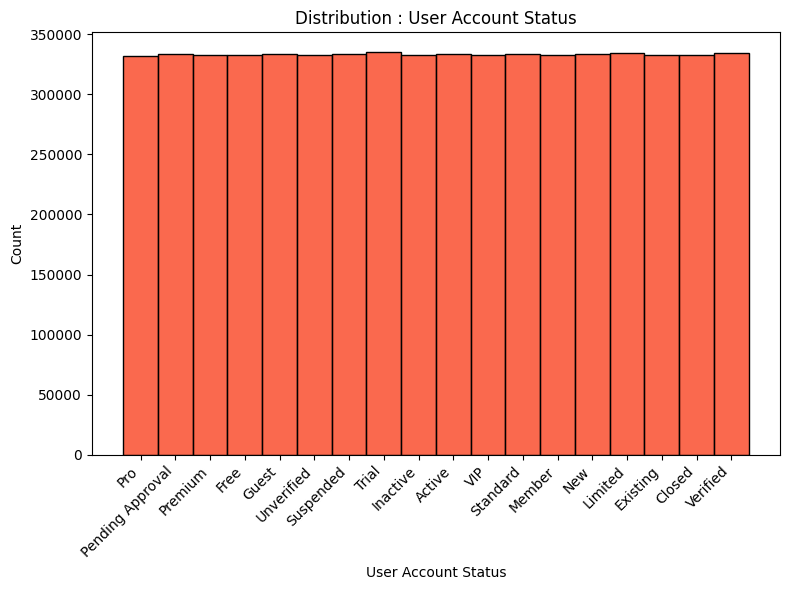

In [ ]:
categorical_list = ["Browser Type", "Operating System", "Merchant Category","User Occupation", "User Gender", "User Account Status"]
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (20,30))
for i in range(len(categorical_list) - 1):

    plt.subplot(3,2,i+1)
    sns.histplot(data[categorical_list[i]],color = hue_color)
    title = 'Distribution : ' + categorical_list[i]
    plt.title(title)
    plt.xticks(rotation=45,ha='right')

plt.figure(figsize = (8,6))
sns.histplot(data[categorical_list[len(categorical_list) - 1]],color = hue_color)
title = 'Distribution : ' + categorical_list[len(categorical_list) - 1]
plt.title(title)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

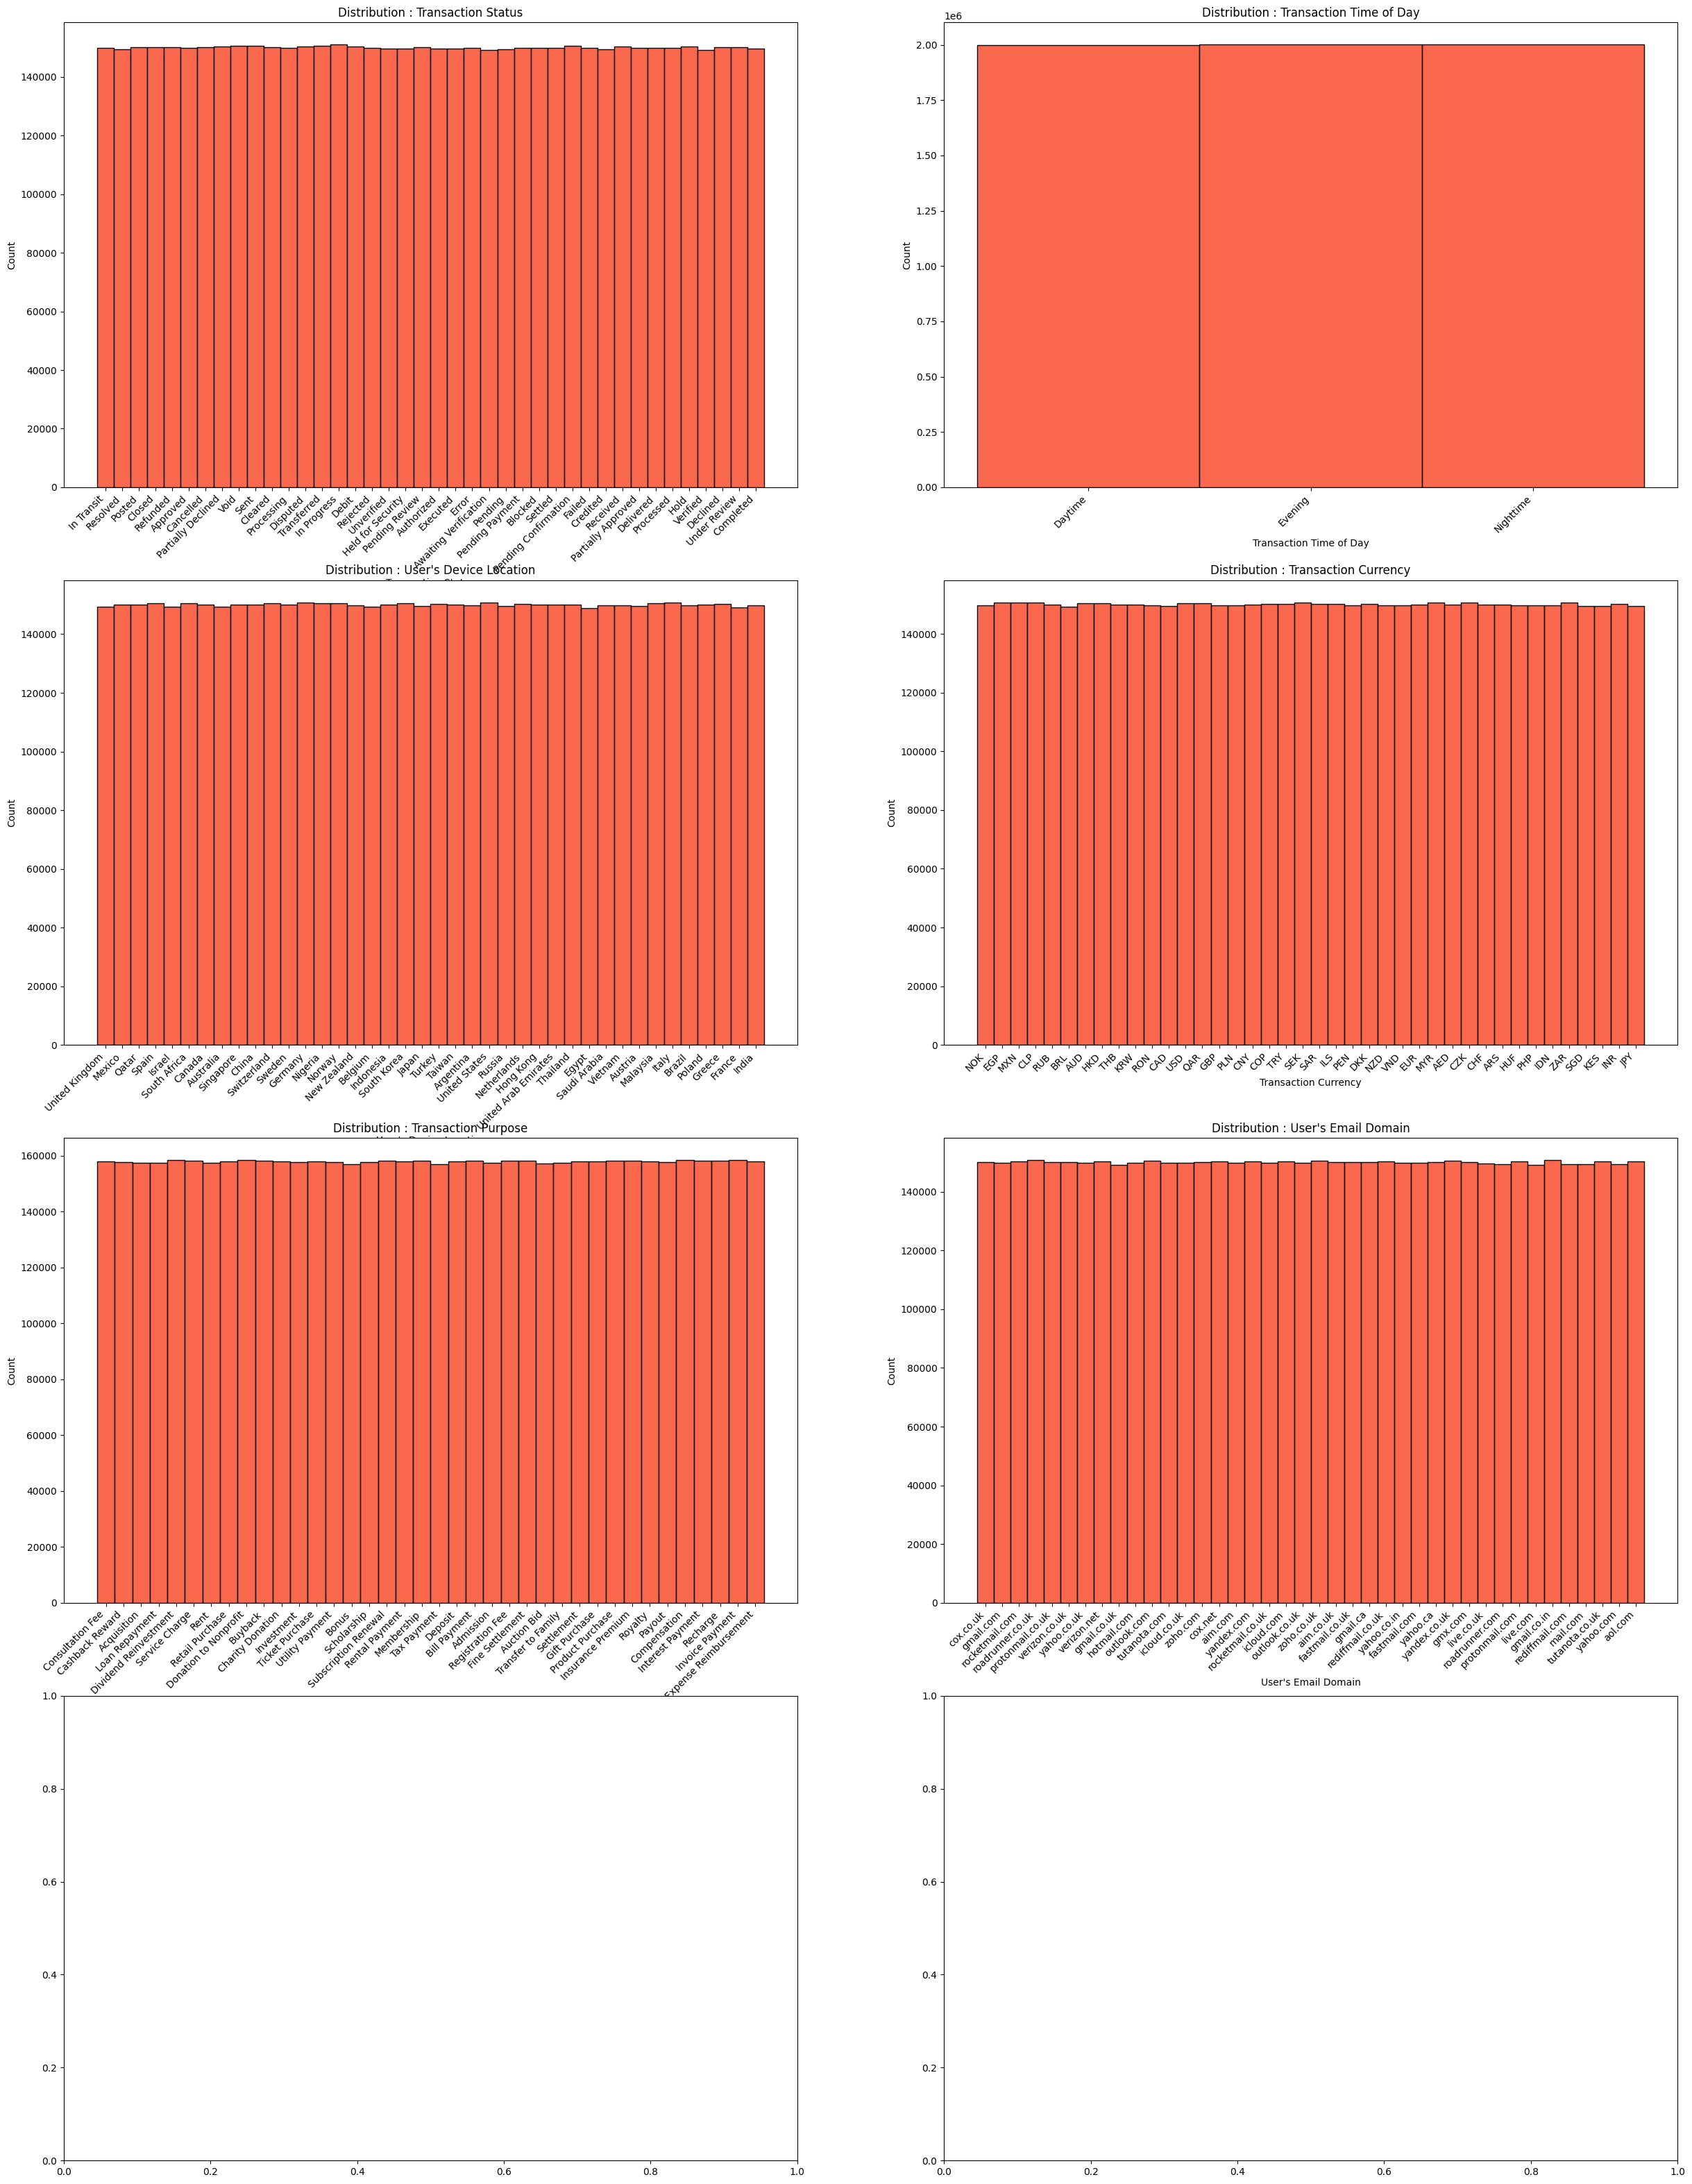

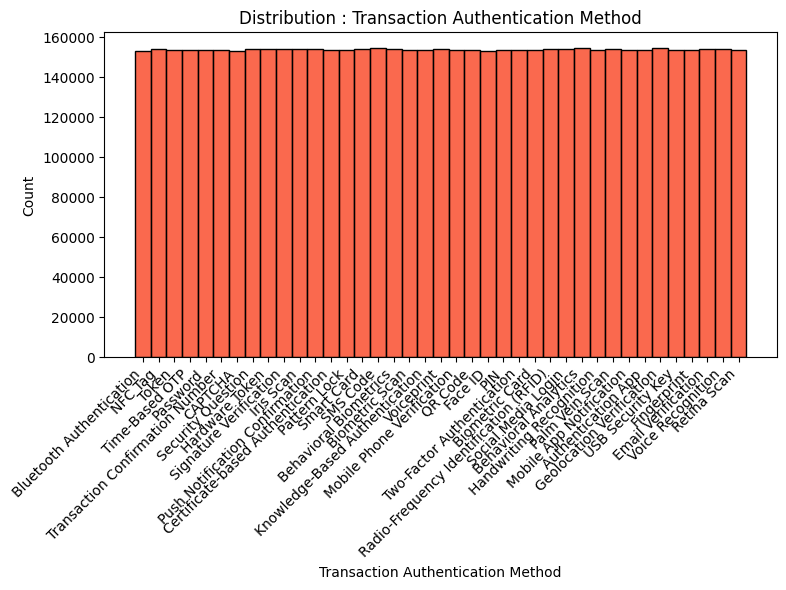

<Figure size 640x480 with 0 Axes>

In [ ]:
categorical_list2 = ["Transaction Status","Transaction Time of Day", "User's Device Location","Transaction Currency", "Transaction Purpose",
                     "User's Email Domain","Transaction Authentication Method"]
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (30,40))
for i in range(len(categorical_list2) - 1):

    plt.subplot(4,2,i+1)
    sns.histplot(data[categorical_list2[i]],color = hue_color)
    title = 'Distribution : ' + categorical_list2[i]
    plt.title(title)
    plt.xticks(rotation=45,ha='right')

plt.figure(figsize = (8,6))
sns.histplot(data[categorical_list2[len(categorical_list2) - 1]],color = hue_color)
title = 'Distribution : ' + categorical_list2[len(categorical_list2) - 1]
plt.title(title)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

plt.savefig('fig8.png')

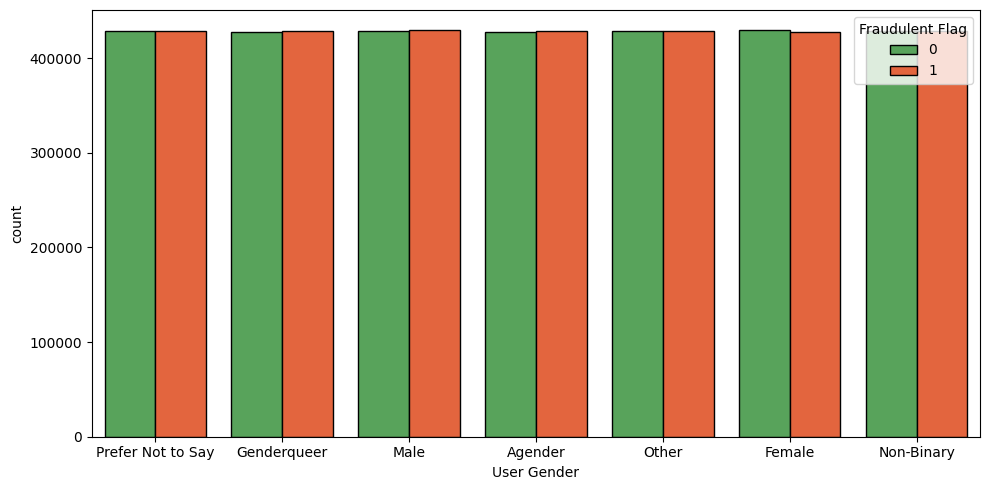

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='User Gender',data = data,hue = "Fraudulent Flag",palette = colours,edgecolor = 'black')
plt.tight_layout()
plt.show()

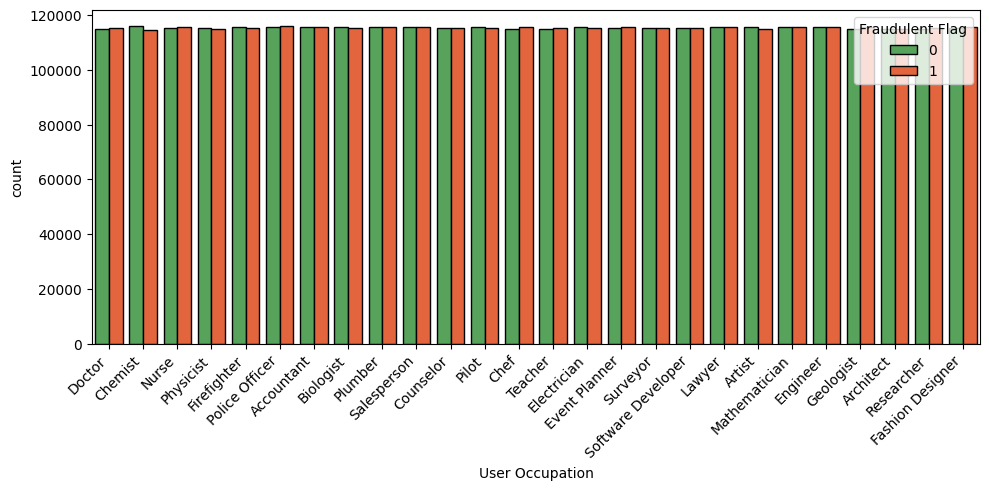

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='User Occupation',data = data,hue = "Fraudulent Flag",palette = colours,edgecolor = 'black')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

plt.savefig('fig10.png')

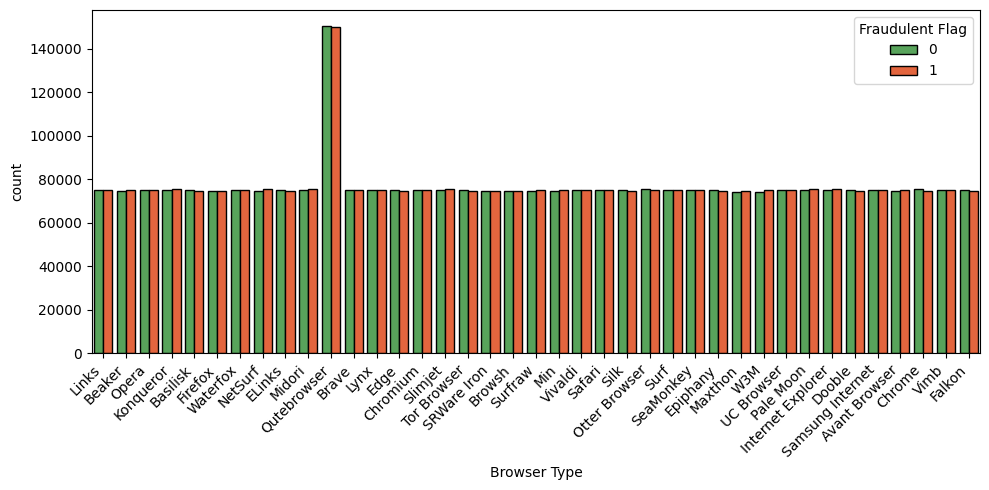

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Browser Type',data = data,hue = "Fraudulent Flag",palette = colours,edgecolor = 'black')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

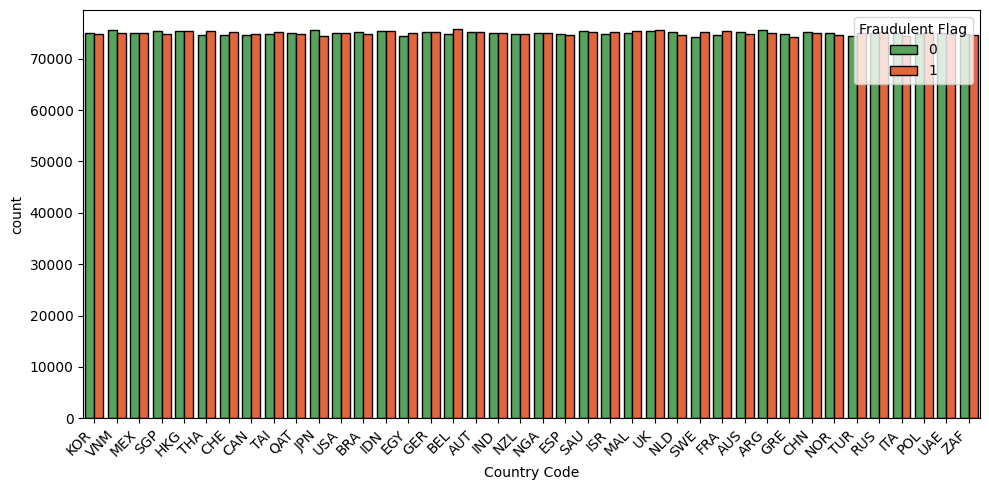

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Country Code',data = data,hue = "Fraudulent Flag",palette = colours,edgecolor = 'black')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

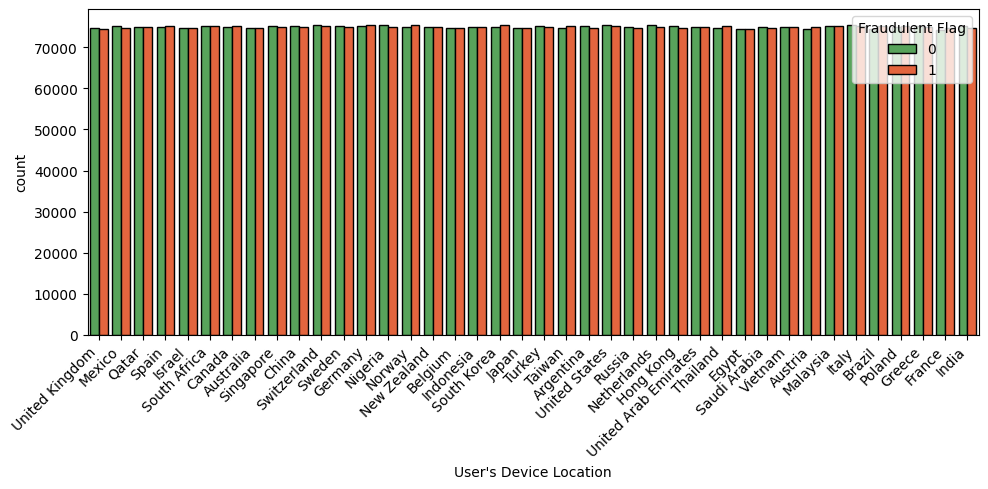

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="User's Device Location",data = data,hue = "Fraudulent Flag",palette = colours,edgecolor = 'black')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

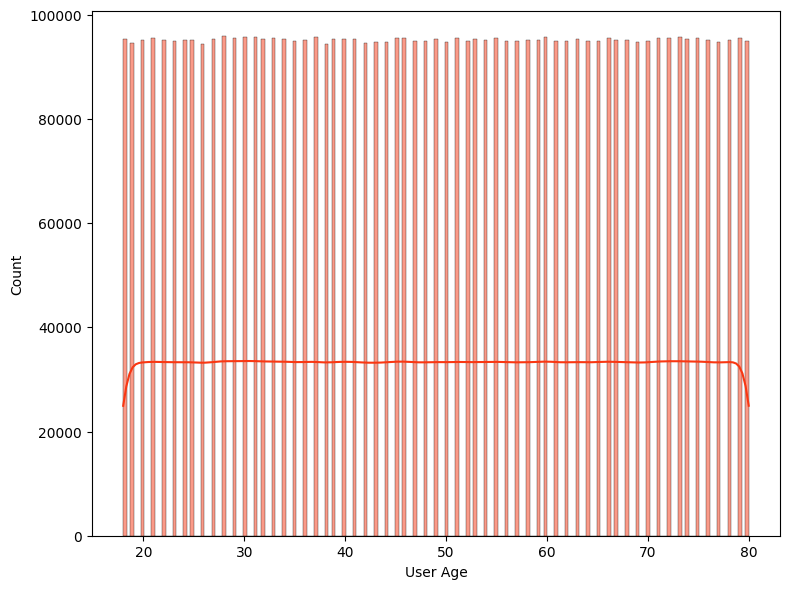

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data['User Age'],kde=True,color=hue_color)
#plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

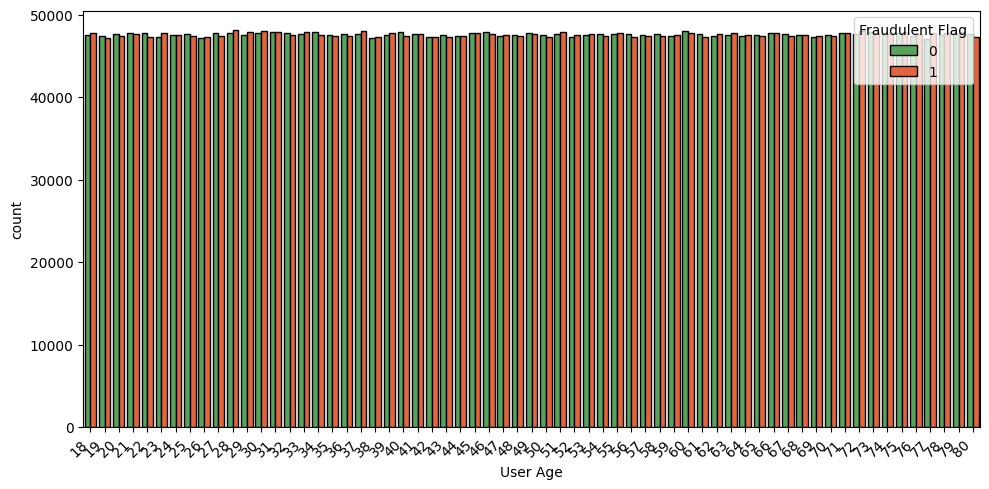

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='User Age',data = data,hue = "Fraudulent Flag",palette = colours,edgecolor = 'black')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

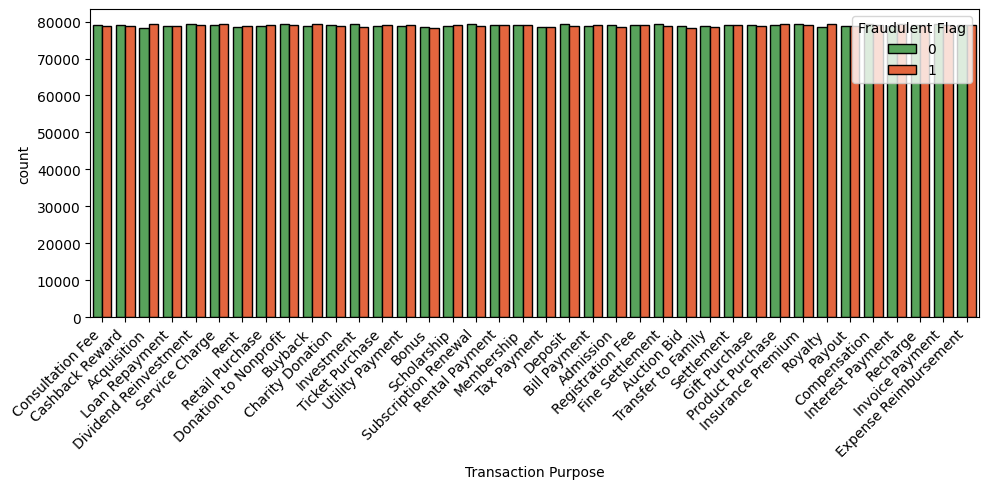

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Transaction Purpose',data = data,hue = "Fraudulent Flag",palette = colours,edgecolor = 'black')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

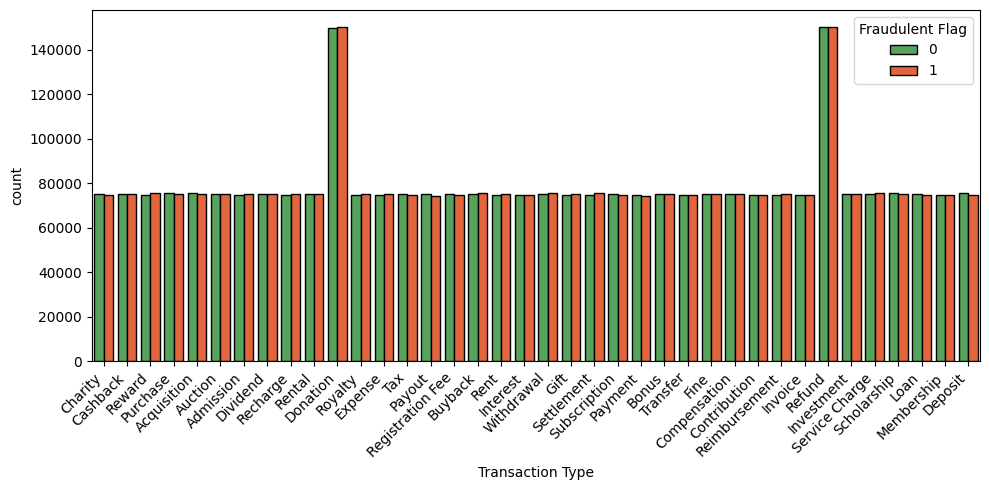

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Transaction Type',data = data,hue = "Fraudulent Flag",palette = colours,edgecolor = 'black')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

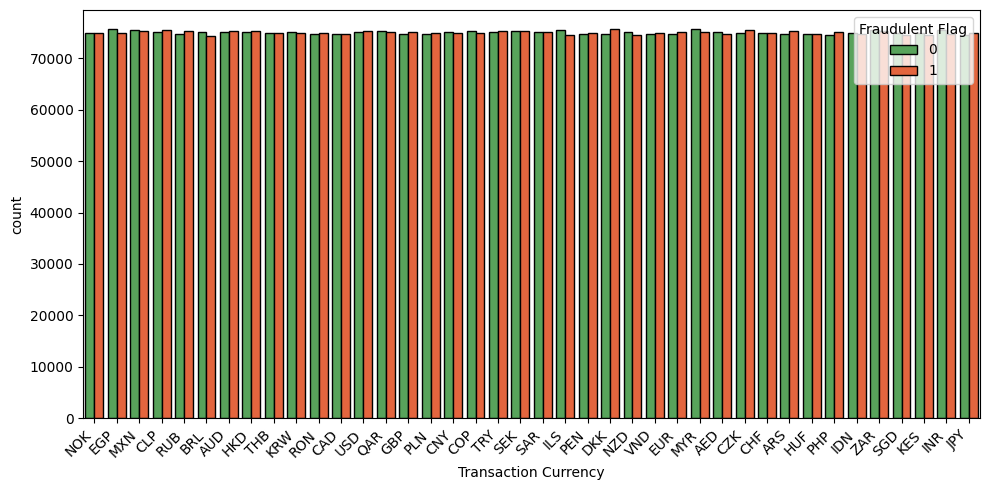

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Transaction Currency',data = data,hue = "Fraudulent Flag",palette = colours,edgecolor = 'black')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

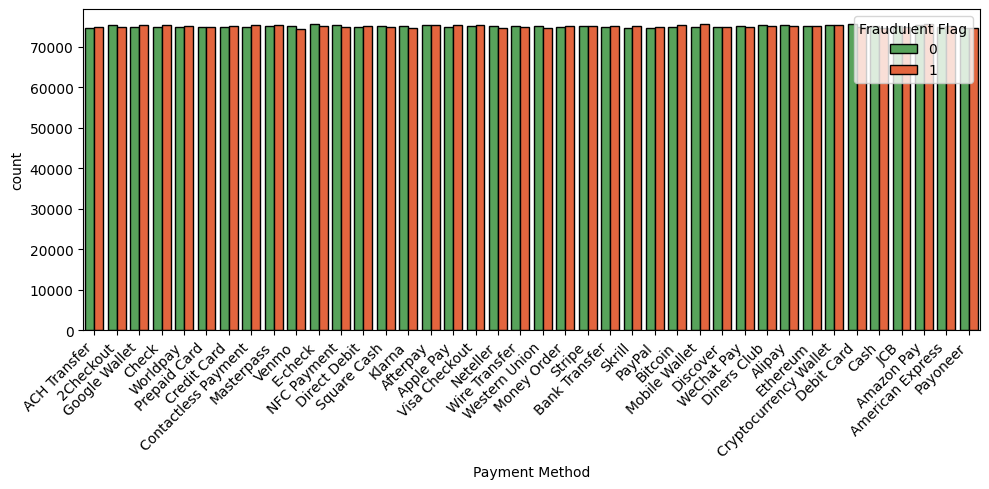

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Payment Method',data = data,hue = "Fraudulent Flag",palette = colours,edgecolor = 'black')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

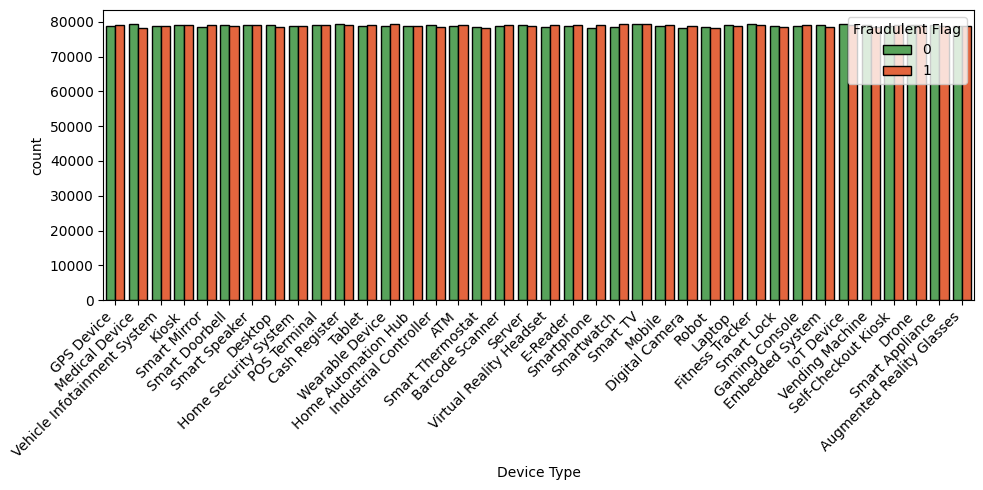

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Device Type',data = data,hue = "Fraudulent Flag",palette = colours,edgecolor = 'black')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [ ]:
num_features = data.select_dtypes(include=['int64','float64'])
cat_features = data.select_dtypes(include=['object'])

numerical_features = num_features.columns.tolist()
categorical_features = cat_features.columns.tolist()

print("numerical_features:")
print(numerical_features)
print('\nCategorical features:')
print(categorical_features)

numerical_features:
['Transaction ID', 'User ID', 'Transaction Amount', 'Merchant ID', 'User Age', 'User Income', 'Location Distance', 'Time Taken for Transaction', "User's Transaction History", "Merchant's Reputation Score", "User's Credit Score", "Merchant's Business Age", 'Fraudulent Flag']

Categorical features:
['Transaction Date and Time', 'Payment Method', 'Country Code', 'Transaction Type', 'Device Type', 'IP Address', 'Browser Type', 'Operating System', 'Merchant Category', 'User Occupation', 'User Gender', 'User Account Status', 'Transaction Status', 'Transaction Time of Day', "User's Device Location", 'Transaction Currency', 'Transaction Purpose', "User's Email Domain", 'Transaction Authentication Method']


In [ ]:
Numerical_features = []
p =[]
for i in num_features:
  if len(num_features[i].unique()) > 10:
    Numerical_features.append(i)
  else:
    p.append(i)
print(Numerical_features)



['Transaction ID', 'User ID', 'Transaction Amount', 'Merchant ID', 'User Age', 'User Income', 'Location Distance', 'Time Taken for Transaction', "User's Transaction History", "Merchant's Reputation Score", "User's Credit Score", "Merchant's Business Age"]


In [ ]:
Num_features = Numerical_features[1:]
Num_features

['User ID',
 'Transaction Amount',
 'Merchant ID',
 'User Age',
 'User Income',
 'Location Distance',
 'Time Taken for Transaction',
 "User's Transaction History",
 "Merchant's Reputation Score",
 "User's Credit Score",
 "Merchant's Business Age"]

**Distribution of Numerical features**

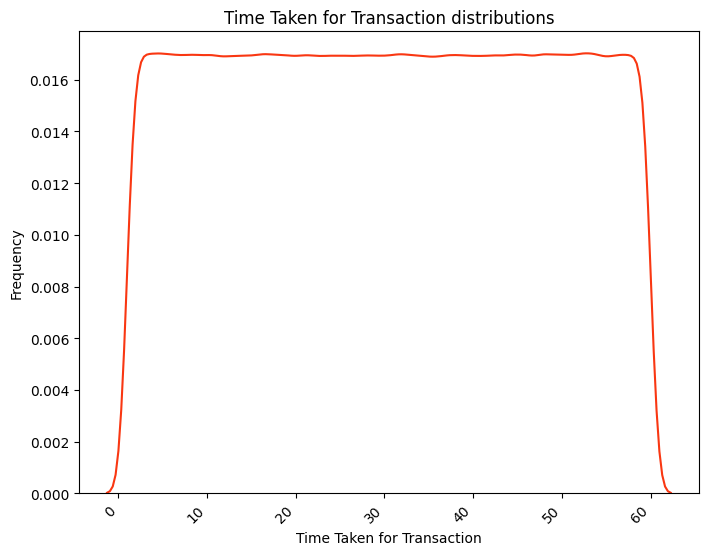

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=data,x='Time Taken for Transaction',color=hue_color)
plt.xlabel('Time Taken for Transaction')
plt.ylabel('Frequency')
plt.title('Time Taken for Transaction distributions')
plt.xticks(rotation=45, ha='right')
plt.show()

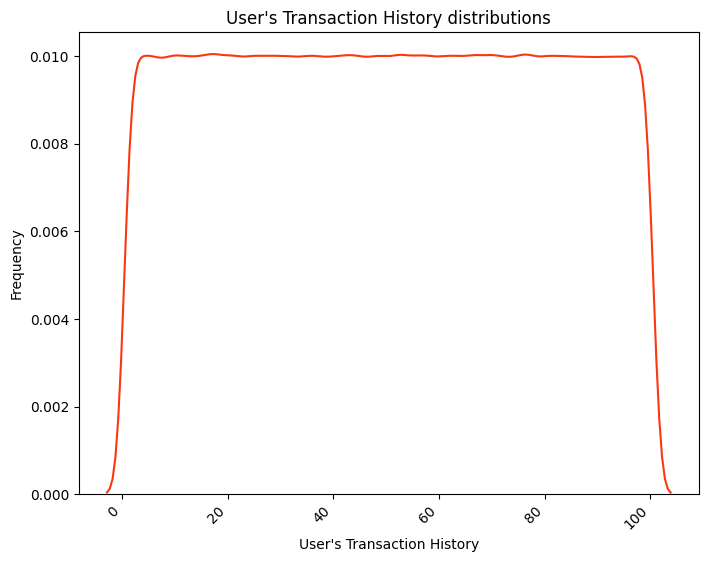

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=data,x="User's Transaction History",color=hue_color)
plt.xlabel("User's Transaction History")
plt.ylabel('Frequency')
plt.title("User's Transaction History distributions")
plt.xticks(rotation=45, ha='right')
plt.show()

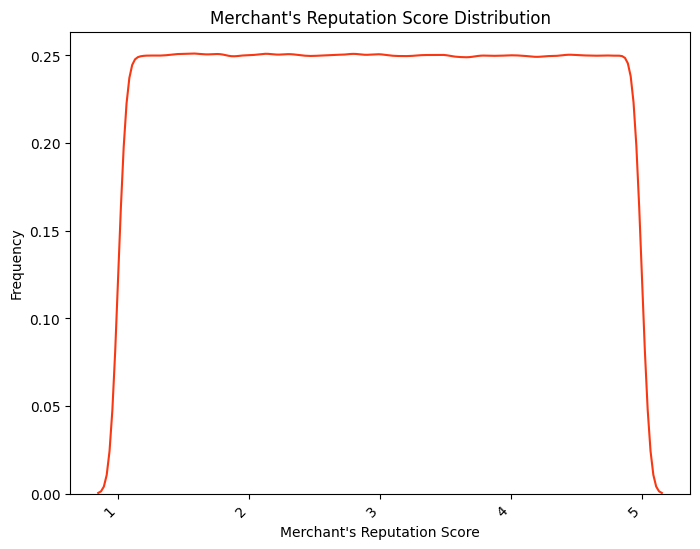

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=data,x="Merchant's Reputation Score",color=hue_color)
plt.xlabel("Merchant's Reputation Score")
plt.ylabel('Frequency')
plt.title("Merchant's Reputation Score Distribution")
plt.xticks(rotation=45, ha='right')
plt.show()

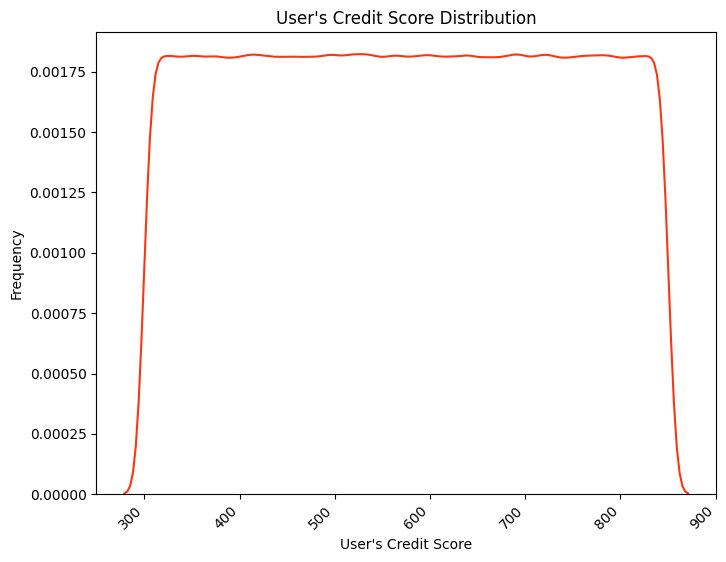

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=data,x="User's Credit Score",color=hue_color)
plt.xlabel("User's Credit Score")
plt.ylabel('Frequency')
plt.title("User's Credit Score Distribution")
plt.xticks(rotation=45, ha='right')
plt.show()

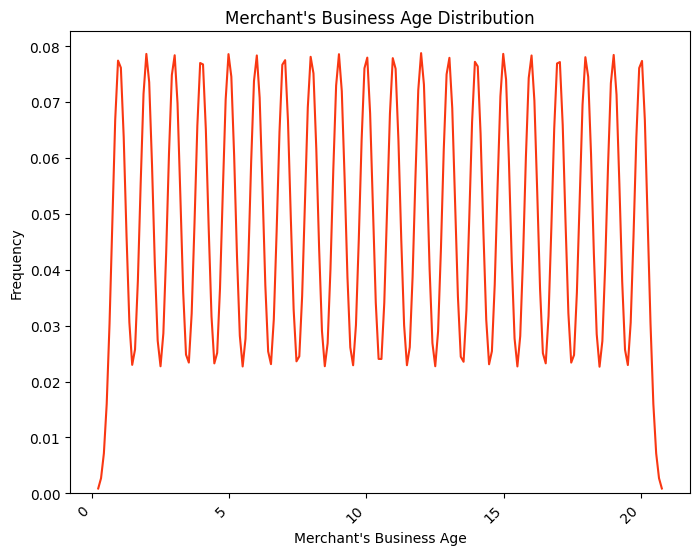

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=data,x="Merchant's Business Age",color=hue_color)
plt.xlabel("Merchant's Business Age")
plt.ylabel('Frequency')
plt.title("Merchant's Business Age Distribution")
plt.xticks(rotation=45, ha='right')
plt.show()

plt.savefig('fig11.png')

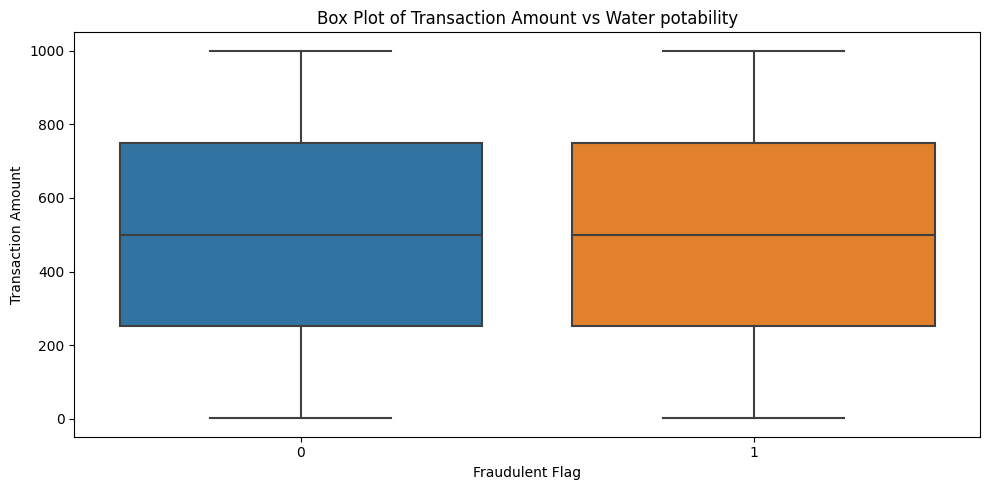

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Fraudulent Flag',y='Transaction Amount',data =data)
plt.title('Box Plot of Transaction Amount vs Water potability')
plt.xlabel('Fraudulent Flag')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()

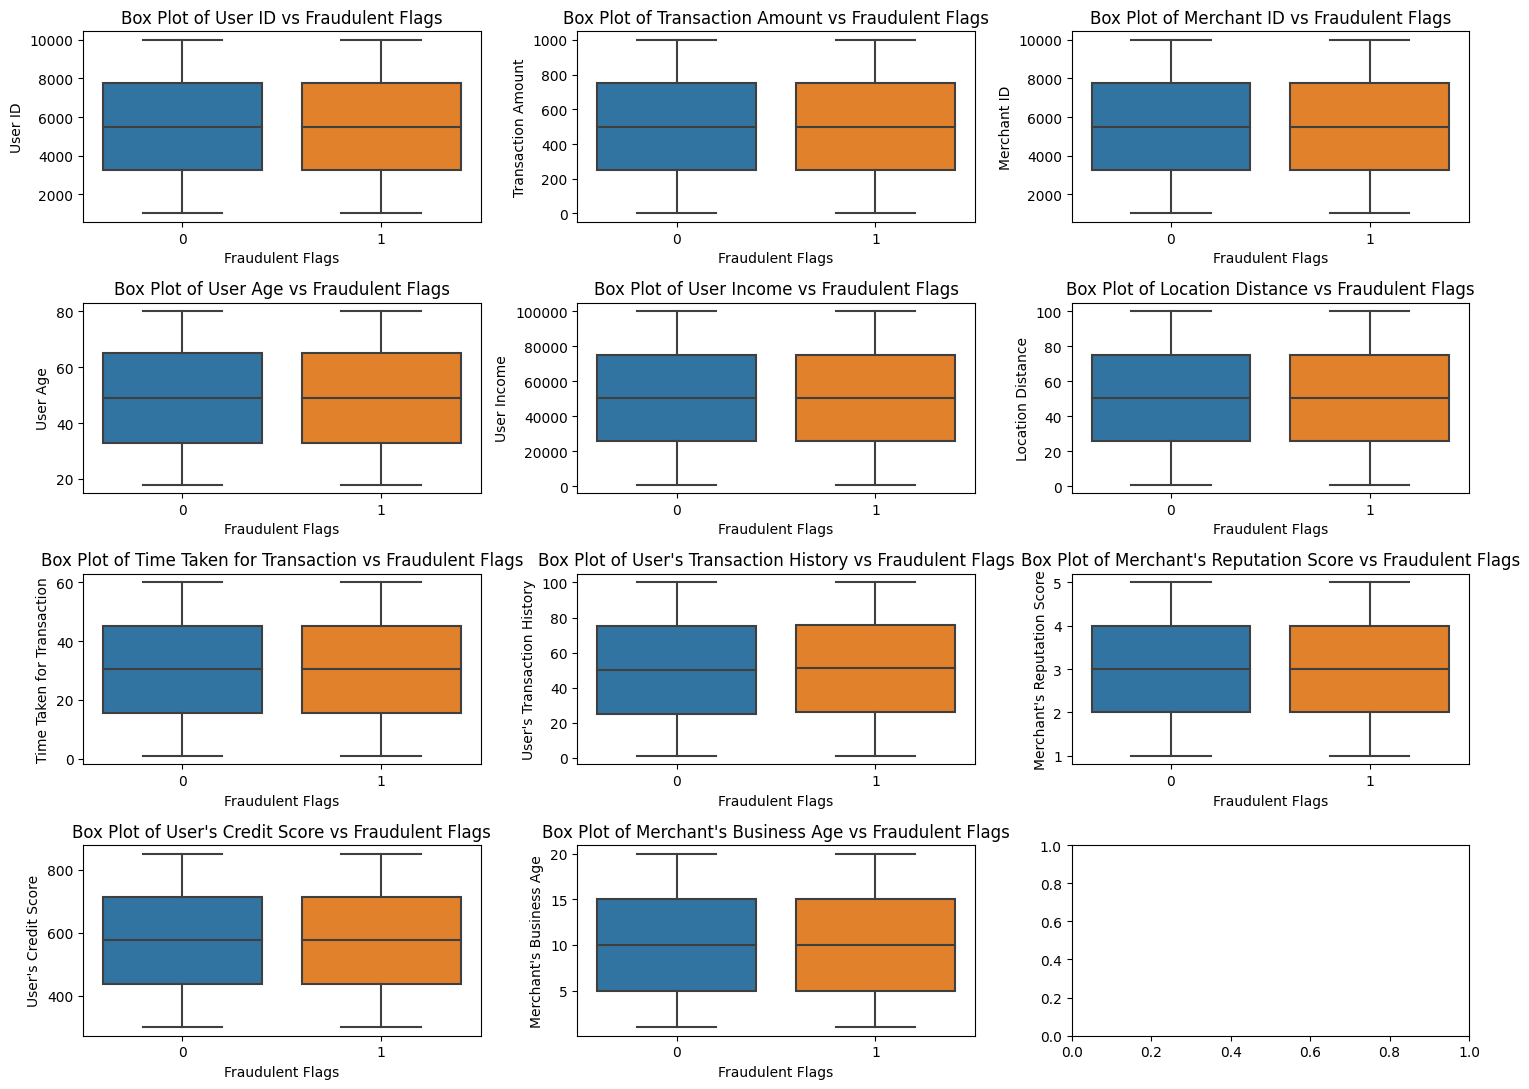

In [ ]:
fig,ax = plt.subplots(4,3,figsize=(15,11))
for i in range(len(Num_features)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x='Fraudulent Flag', y=Num_features[i], data= data)
    plt.title('Box Plot of' +" "+ Num_features[i] + " " + 'vs Fraudulent Flags')
    plt.xlabel('Fraudulent Flags')
    plt.ylabel(Num_features[i])

plt.tight_layout()
plt.show()

In [ ]:
['User ID',
 'Transaction Amount',
 'Merchant ID',
 'User Age',
 'User Income',
 'Location Distance',
 'Time Taken for Transaction',
 "User's Transaction History",
 "Merchant's Reputation Score",
 "User's Credit Score",
 "Merchant's Business Age"]

Num_feature1 = ['User ID','Transaction Amount','Merchant ID','User Age']
Num_feature2 = ['User Income','Location Distance','Time Taken for Transaction',"User's Transaction History"]
Num_feature3 = ["Merchant's Reputation Score","User's Credit Score","Merchant's Business Age",'User Age']
Num_feature4 = ['User Income','Transaction Amount','User ID',"Merchant ID"]
Num_feature5 = ["Merchant's Reputation Score","Location Distance","Merchant's Business Age",'User Age']
Num_feature6 = ['User Age','Transaction Amount','Location Distance',"User's Transaction History"]
Num_feature7 = ['User Age','User ID','Transaction Amount',"User's Transaction History"]


In [ ]:
sample_size = int(0.001*len(data))

sample_data = data.sample(n=sample_size,random_state=42)
sample_data.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Transaction_Date_Time
1324896,27726896,5443,767.30,2021-07-29 05:59:56,2780,JCB,MAL,Payment,Barcode Scanner,51.63.228.167,...,4.84,Poland,PHP,Service Charge,759,protonmail.co.uk,4,Mobile Phone Verification,0,2021-07-29 05:59:56
3566176,37627810,5941,800.14,2021-01-03 02:12:52,3115,Visa Checkout,AUS,Acquisition,Embedded System,60.206.56.189,...,1.52,Hong Kong,SGD,Cashback Reward,768,roadrunner.co.uk,19,Radio-Frequency Identification (RFID),1,2021-01-03 02:12:52
1109043,47103356,1370,769.67,2022-08-22 12:19:21,1322,ACH Transfer,SGP,Rental,Fitness Tracker,121.14.89.116,...,3.01,New Zealand,QAR,Invoice Payment,616,roadrunner.com,12,USB Security Key,1,2022-08-22 12:19:21
4286042,82812062,9425,382.26,2022-12-28 10:21:34,1523,Prepaid Card,MAL,Expense,Drone,101.133.191.48,...,1.99,New Zealand,CZK,Buyback,432,live.com,17,Fingerprint,0,2022-12-28 10:21:34
5395174,76542500,3653,613.53,2021-08-08 12:38:03,4594,Visa Checkout,ISR,Bonus,Smart Speaker,53.232.127.23,...,3.38,Norway,CNY,Settlement,421,fastmail.co.uk,12,Behavioral Analytics,0,2021-08-08 12:38:03


**Numerical feature vs Numerical feature with respect to the target feature**

In [ ]:
a = 0
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))  # 3 rows and 2 columns for a total of 6 subplots

for i in range(len(Num_feature1)):
    for j in range(len(Num_feature1)):
        if i != j and j > i:
            a += 1
            if a <= 6:
                plt.subplot(3, 2, a)
                sns.scatterplot(x=Num_feature1[i], y=Num_feature1[j], data=sample_data, hue='Fraudulent Flag', palette=colours, edgecolor='black')
                plt.legend(['Non Fraudulent', 'Fraudulent'])
                title = Num_feature1[i] + ' vs ' + Num_feature1[j]
                plt.title(title)

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
a = 0
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))  # 3 rows and 2 columns for a total of 6 subplots

for i in range(len(Num_feature2)):
    for j in range(len(Num_feature2)):
        if i != j and j > i:
            a += 1
            if a <= 6:
                plt.subplot(3, 2, a)
                sns.scatterplot(x=Num_feature2[i], y=Num_feature2[j], data=sample_data, hue='Fraudulent Flag', palette=colours, edgecolor='black')
                plt.legend(['Non Fraudulent', 'Fraudulent'])
                title = Num_feature2[i] + ' vs ' + Num_feature2[j]
                plt.title(title)

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
a = 0
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))  # 3 rows and 2 columns for a total of 6 subplots

for i in range(len(Num_feature7)):
    for j in range(len(Num_feature7)):
        if i != j and j > i:
            a += 1
            if a <= 6:
                plt.subplot(3, 2, a)
                sns.scatterplot(x=Num_feature7[i], y=Num_feature7[j], data=sample_data, hue='Fraudulent Flag', palette=colours, edgecolor='black')
                plt.legend(['Non Fraudulent', 'Fraudulent'])
                title = Num_feature7[i] + ' vs ' + Num_feature7[j]
                plt.title(title)

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **Summary of EDA**

Fraudulent Flag: Classes 1 and 0 present in this feature is balanced

Both Numerical and Categorical features are uniformly distributed

Nearly all Numerical and categorical features with respect to the target feature (Fraudulent Flag) follows uniform distribution.

There are no missing values in the dataset

There are no duplicates in the dataset

There are no outliers in the dataset

In the** Transaction Type** feature, Donation and Refund have the highest count. From the plot, it is seen that fraudulent and non-fraudulent transaction occur with this type of transaction.

Qutebrowser have the highest use for fraudulent transaction


